# Data Analysis for Ocular Disease Dataset

## 1. Overview

This analysis focuses on understanding the structure, properties, and quality of the dataset used for training, validation, and testing the Cataract Detection Model. The dataset contains the following classes:
- **Cataract**
- **Diabetic Retinopathy**
- **Glaucoma**
- **Normal**

The dataset is organized into `train`, `valid`, and `test` subsets.

---

## 2. Goals

1. **Class Distribution**:
   - Analyze the number of images per class in each subset.
   - Identify any class imbalances.

2. **Image Properties**:
   - Check image dimensions, formats, and consistency.
   - Detect and document corrupted files.

3. **Visualization**:
   - Display sample images from each class.
   - Visualize class distribution with bar charts.

4. **Pixel Statistics**:
   - Compute pixel intensity mean and standard deviation for the dataset.

5. **Summary Outputs**:
   - Save dataset details in a CSV file (`dataset_summary.csv`).
   - Generate a list of corrupted files, if any (`corrupted_files.txt`).

---

## 3. Results

1. **Class Distribution**:
   - Bar charts showing the number of images per class for `train`, `valid`, and `test` subsets.
   - A summary table with counts of images for each class.

2. **Image Properties**:
   - Descriptive statistics for image dimensions (mean, min, max).
   - Image format counts (e.g., `.jpg`, `.png`).

3. **Pixel Statistics**:
   - Mean and standard deviation of pixel intensities.

4. **Data Quality**:
   - Details of corrupted or unreadable files.

---

## 4. Visualization

### Class Distribution
- A bar chart to visualize the number of images in each class.

### Sample Images
- A gallery of sample images for each class and subset.

---

## 5. Conclusions

1. Any issues identified in class balance, image properties, or quality will be addressed in data preprocessing.
2. Further steps include refining augmentation strategies based on analysis findings.


### Class Distribution ###

TRAIN SET:
cataract: 532 images
diabetic_retinopathy: 586 images
glaucoma: 492 images
normal: 516 images

VALID SET:
cataract: 244 images
diabetic_retinopathy: 300 images
glaucoma: 258 images
normal: 263 images

TEST SET:
cataract: 261 images
diabetic_retinopathy: 302 images
glaucoma: 240 images
normal: 256 images

Dataset summary saved as `dataset_summary.csv`.


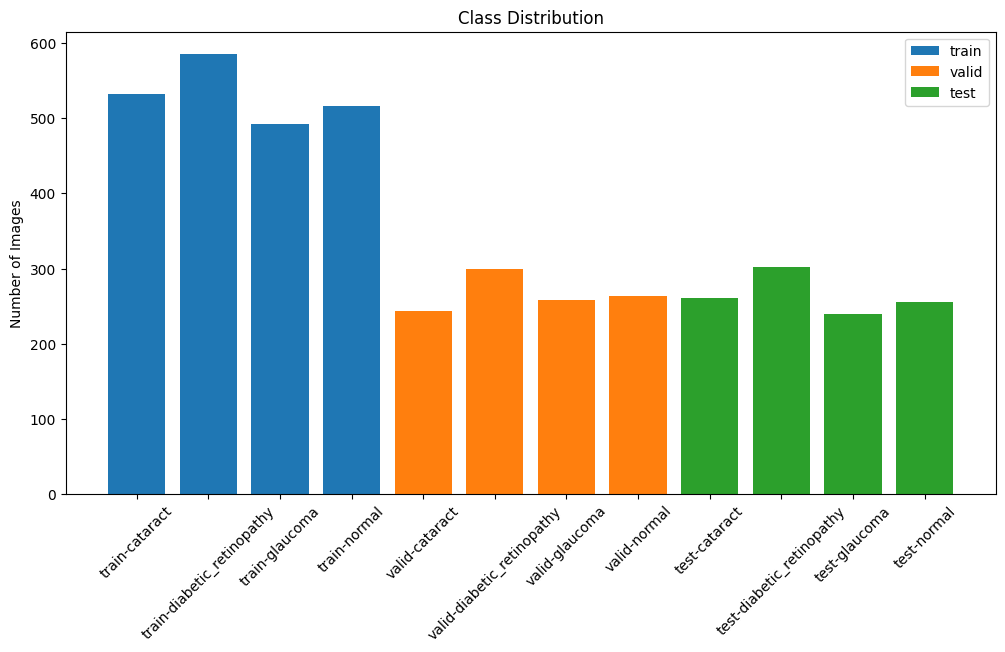


### Image Properties ###


Inspecting images: 100%|██████████| 4250/4250 [00:00<00:00, 7476.13it/s]



Image Dimensions:
        width  height
count  4250.0  4250.0
mean    299.0   299.0
std       0.0     0.0
min     299.0   299.0
25%     299.0   299.0
50%     299.0   299.0
75%     299.0   299.0
max     299.0   299.0

Image Formats:
JPEG    4250
Name: count, dtype: int64

No corrupted files found.

### Sample Images ###


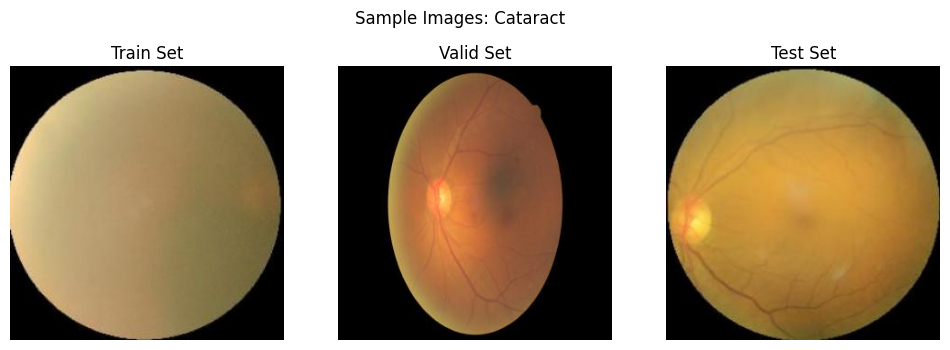

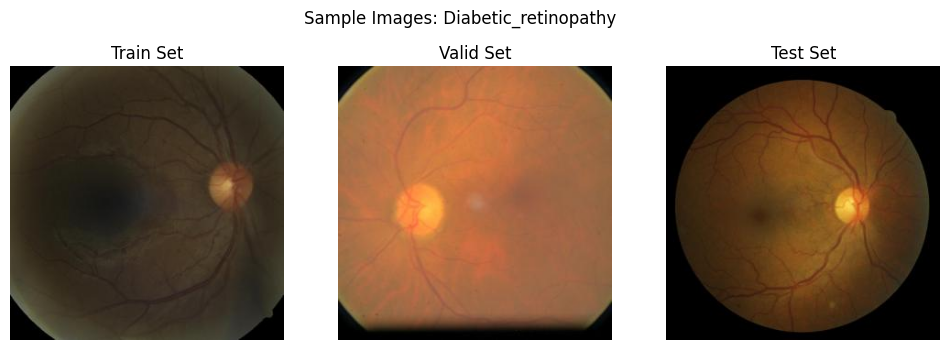

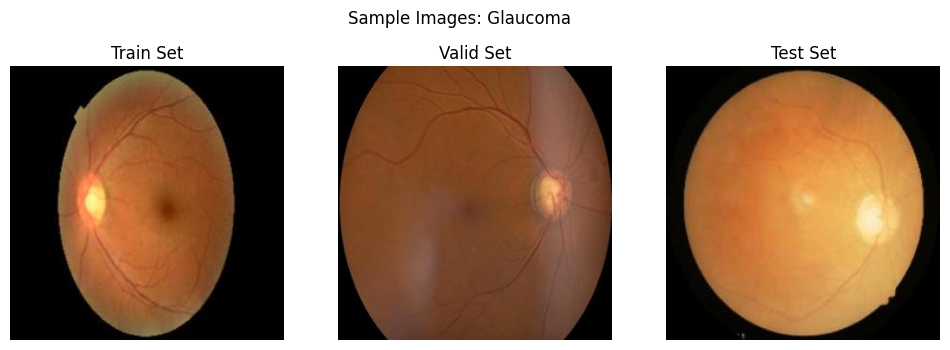

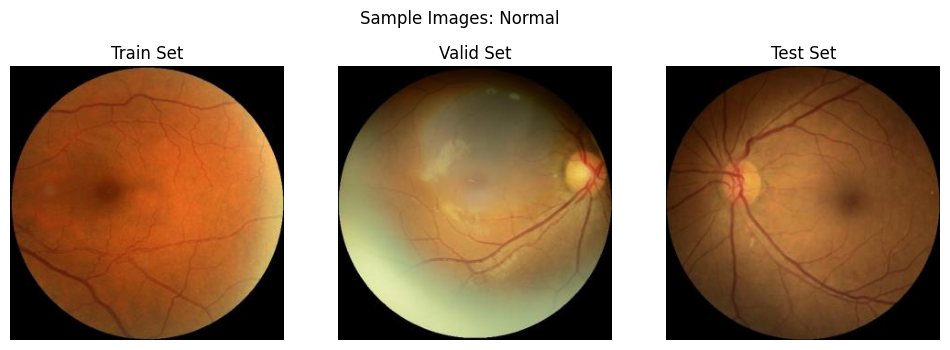


### Pixel Statistics ###


Computing pixel statistics: 100%|██████████| 4250/4250 [00:05<00:00, 824.75it/s]


Pixel Mean: 78.85361320737957
Pixel Standard Deviation: 57.680714486863856


In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm


# Dataset configuration
DATASET_DIR = "../dataset/eyes.v1i.folder"
SUBSETS = ["train", "valid", "test"]
CLASSES = ["cataract", "diabetic_retinopathy", "glaucoma", "normal"]

# Initialize data summary
data_summary = []

def analyze_class_distribution():
    print("### Class Distribution ###")
    class_counts = {subset: {cls: 0 for cls in CLASSES} for subset in SUBSETS}
    for subset in SUBSETS:
        print(f"\n{subset.upper()} SET:")
        for cls in CLASSES:
            class_dir = os.path.join(DATASET_DIR, subset, cls)
            num_images = len(os.listdir(class_dir))
            class_counts[subset][cls] = num_images
            print(f"{cls}: {num_images} images")
            for img_file in os.listdir(class_dir):
                data_summary.append({"subset": subset, "class": cls, "file_path": os.path.join(class_dir, img_file)})
    
    # Save dataset summary
    df_summary = pd.DataFrame(data_summary)
    df_summary.to_csv("dataset_summary.csv", index=False)
    print("\nDataset summary saved as `dataset_summary.csv`.")

    # Plot distribution
    plt.figure(figsize=(12, 6))
    for subset in SUBSETS:
        counts = list(class_counts[subset].values())
        plt.bar([f"{subset}-{cls}" for cls in CLASSES], counts, label=subset)
    plt.xticks(rotation=45)
    plt.title("Class Distribution")
    plt.legend()
    plt.ylabel("Number of Images")
    plt.show()


def inspect_image_properties():
    print("\n### Image Properties ###")
    image_dimensions = []
    image_formats = []
    corrupted_files = []

    for entry in tqdm(data_summary, desc="Inspecting images"):
        try:
            img = Image.open(entry["file_path"])
            image_dimensions.append(img.size)
            image_formats.append(img.format)
            img.close()
        except Exception:
            corrupted_files.append(entry["file_path"])

    # Summary of dimensions and formats
    dimensions_df = pd.DataFrame(image_dimensions, columns=["width", "height"])
    print(f"\nImage Dimensions:\n{dimensions_df.describe()}")
    print(f"\nImage Formats:\n{pd.Series(image_formats).value_counts()}")

    # Corrupted files
    if corrupted_files:
        print(f"\nCorrupted Files: {len(corrupted_files)}")
        with open("corrupted_files.txt", "w") as f:
            f.write("\n".join(corrupted_files))
        print("Corrupted files saved to `corrupted_files.txt`.")
    else:
        print("\nNo corrupted files found.")

def visualize_sample_images():
    print("\n### Sample Images ###")
    for cls in CLASSES:
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        fig.suptitle(f"Sample Images: {cls.capitalize()}")
        for i, subset in enumerate(SUBSETS):
            class_dir = os.path.join(DATASET_DIR, subset, cls)
            sample_image = os.listdir(class_dir)[0]
            img = Image.open(os.path.join(class_dir, sample_image))
            axes[i].imshow(img)
            axes[i].set_title(f"{subset.capitalize()} Set")
            axes[i].axis("off")
        plt.show()

def compute_pixel_statistics():
    print("\n### Pixel Statistics ###")
    pixel_sums = []
    pixel_counts = []

    for entry in tqdm(data_summary, desc="Computing pixel statistics"):
        try:
            img = Image.open(entry["file_path"]).convert("L")
            pixels = list(img.getdata())
            pixel_sums.extend(pixels)
            pixel_counts.append(len(pixels))
        except Exception:
            continue

    # Compute statistics
    mean = sum(pixel_sums) / sum(pixel_counts)
    variance = sum((p - mean) ** 2 for p in pixel_sums) / len(pixel_sums)
    std_dev = variance ** 0.5

    print(f"Pixel Mean: {mean}")
    print(f"Pixel Standard Deviation: {std_dev}")

if __name__ == "__main__":
    analyze_class_distribution()
    inspect_image_properties()
    visualize_sample_images()
    compute_pixel_statistics()

